### McDonalds Nutrition Analysis EDA

In [1]:
#Import Libraries
import numpy as np 
import pandas as pd 
import os
data = pd.read_csv('menu.csv')

Check for missing data:)

In [2]:
data.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

Yes! This dataset is perfect. All values are in place. Well let's see what we love to eat :D I see that the dishes are divided into categories. Breakfast, coffee and tea and so on. The first thing is interesting to see how many useful and harmful substances are in dishes from different categories.

In [3]:
import matplotlib.pyplot as plt

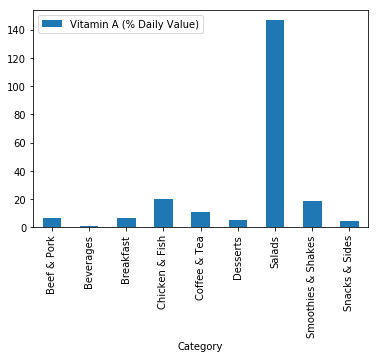

In [4]:
data.pivot_table('Vitamin A (% Daily Value)', 'Category').plot(kind='bar', stacked=True)


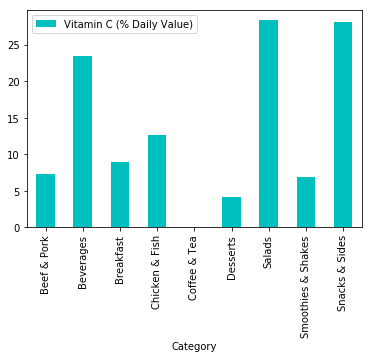

In [5]:
data.pivot_table('Vitamin C (% Daily Value)', 'Category').plot(kind='bar', stacked=True, color = 'c')


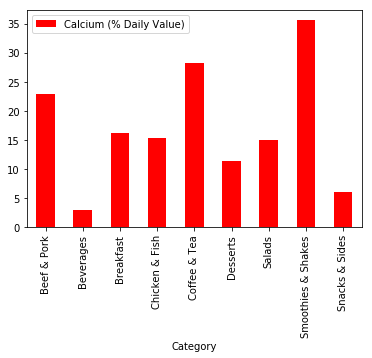

In [6]:
data.pivot_table('Calcium (% Daily Value)', 'Category').plot(kind='bar', stacked=True, color = 'r')


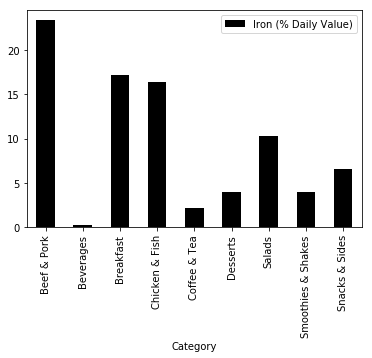

In [7]:
data.pivot_table('Iron (% Daily Value)', 'Category').plot(kind='bar', stacked=True, color = 'k')


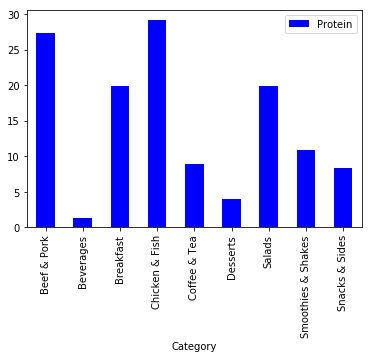

In [8]:
data.pivot_table('Protein', 'Category').plot(kind='bar', stacked=True, color = 'b')

All this can be displayed on one chart. But please excuse me. I respect every vitamin. Seems pretty logical. We see that salads contain a record amount of vitamin A compared to dishes from other categories. No wonder! After all, vitamin A is rich in many vegetables, as well as fish and eggs. We can also see how similar the distribution graphs of protein and calcium are! Even for me, it's no secret that protein is rich in calcium.

You can view each substance. Now I am interested in how many harmful substances are in my favorite dishes.

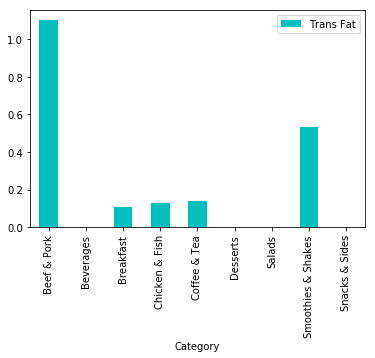

In [9]:
data.pivot_table('Trans Fat', 'Category').plot(kind='bar', stacked=True, color = 'c')

All right. I'll eat desserts :D

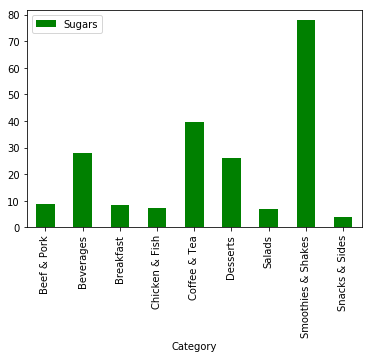

In [10]:
data.pivot_table('Sugars', 'Category').plot(kind='bar', stacked=True, color = 'g')

Or not :D

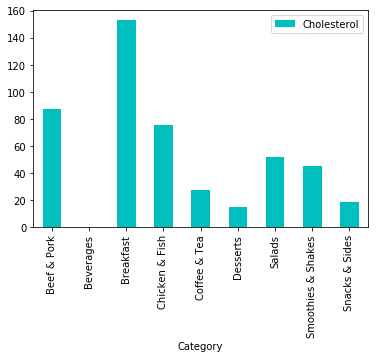

In [11]:
data.pivot_table('Cholesterol', 'Category').plot(kind='bar', stacked=True, color = 'c')

Probably better to have Breakfast at home.
![![image.png](attachment:image.png)](https://media.sproutsocial.com/uploads/2010/12/Are-you-making-these-5-social-media-mistakes.jpg)

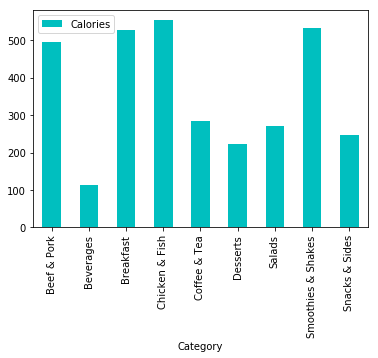

In [12]:
data.pivot_table('Calories', 'Category').plot(kind='bar', stacked=True, color = 'c')

If you are on a diet but sometimes like to sin with a hamburger then this is for you! You can afford a drink and a salad. But calories are better to look at each product separately. little later:) I'll do something just as interesting.

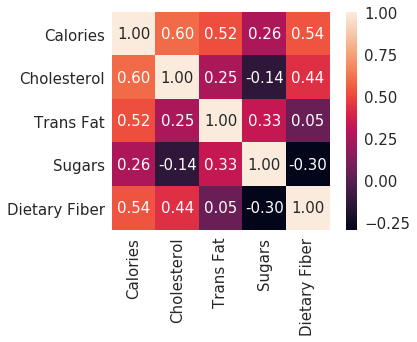

In [13]:
import seaborn as sns
cols = ['Calories','Cholesterol','Trans Fat','Sugars','Dietary Fiber']
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale = 1.5)
hm = sns.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

Well, no amazing discoveries we have not made. The correlation matrix confirmed the idea that cholesterol and trans fats are best avoided. They are not only harmful to the body, but also increase the caloric content of food hehe
If you want to know the average calorie content of products, you can see the distribution. Or look at any of the measures of the Central trend.

368.2692307692308
340.0


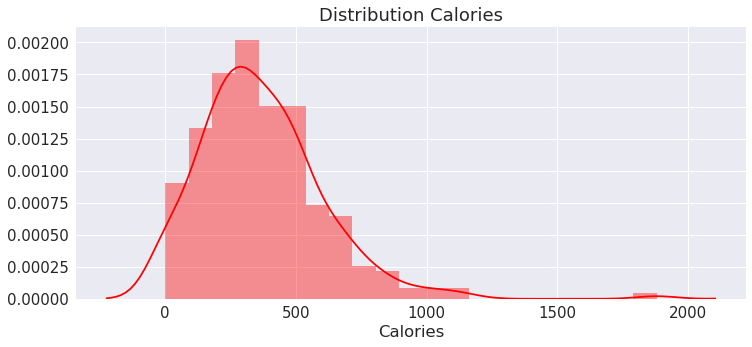

In [14]:
plt.figure(figsize=(12,5))
plt.title("Distribution Calories")
ax = sns.distplot(data["Calories"], color = 'r')

print(data.Calories.mean())
print(data.Calories.median())

29.423076923076923
17.5


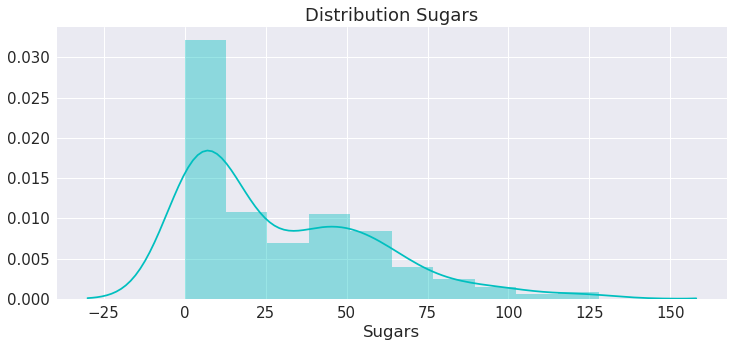

In [15]:
plt.figure(figsize=(12,5))
plt.title("Distribution Sugars")
ax = sns.distplot(data["Sugars"], color = 'c')


print(data.Sugars.mean())
print(data.Sugars.median())

Basically, the products contain relatively little sugar. But remember that most of the sugar contained in shakes, and do not forget about it at the next visit to McDonald's :)

The enemy must know in person! Look at these brazen sugar delicious foods lol

In [16]:
def plot(grouped):
    item = grouped["Item"].sum()
    item_list = item.sort_index()
    item_list = item_list[-20:]
    plt.figure(figsize=(9,10))
    graph = sns.barplot(item_list.index,item_list.values)
    labels = [aj.get_text()[-40:] for aj in graph.get_yticklabels()]
    graph.set_yticklabels(labels)

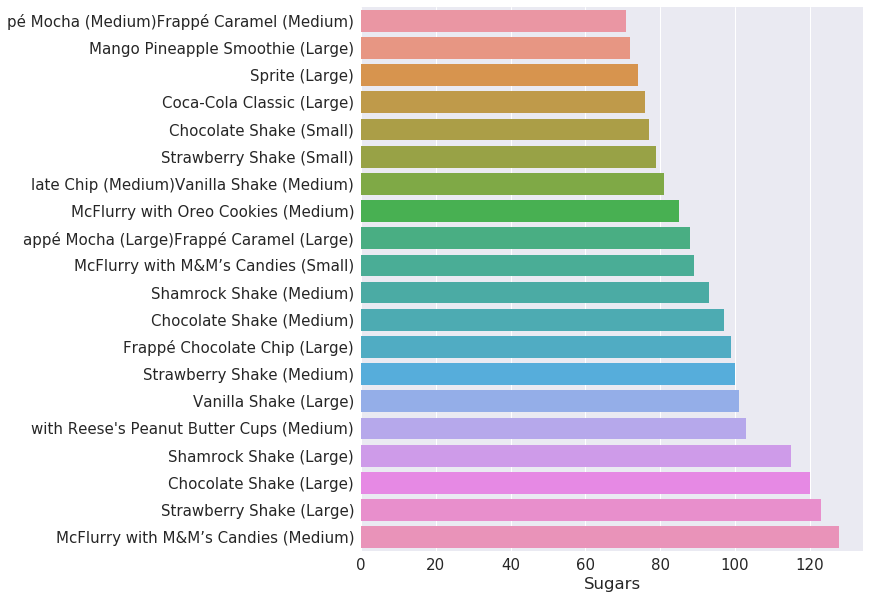

In [17]:
sugar = data.groupby(data["Sugars"])
plot(sugar)

How many times I bought a shake when I was on a diet. Now everything became clear.....
![![image.png](attachment:image.png)](https://avatars.yandex.net/get-music-user-playlist/70586/583840106.1004.99420/m1000x1000?1531833446778&webp=false)

I think it is important to see what dishes we can meet vitamins

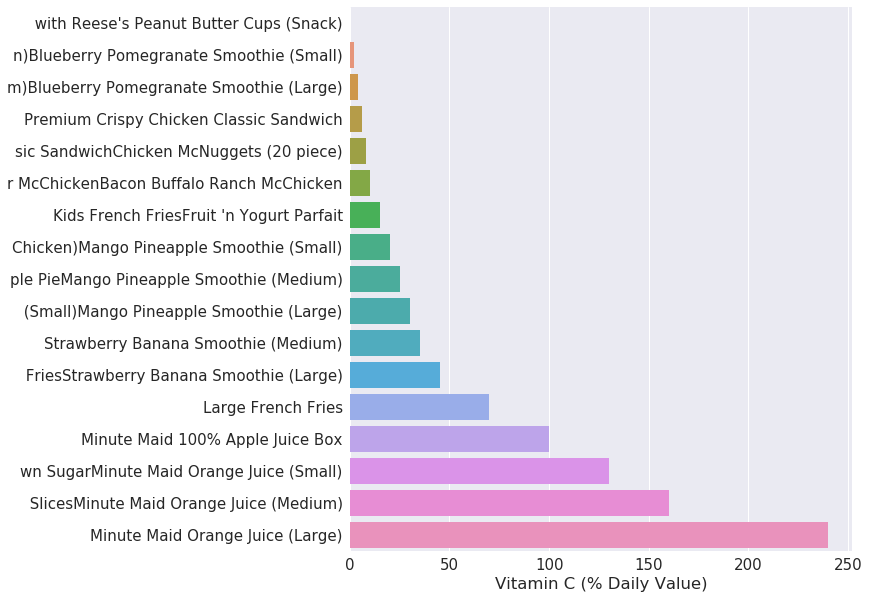

In [18]:
vitaminC = data.groupby(data["Vitamin C (% Daily Value)"])
plot(vitaminC)

Logical! Autumn is coming, don't forget to drink orange juice and be healthy!

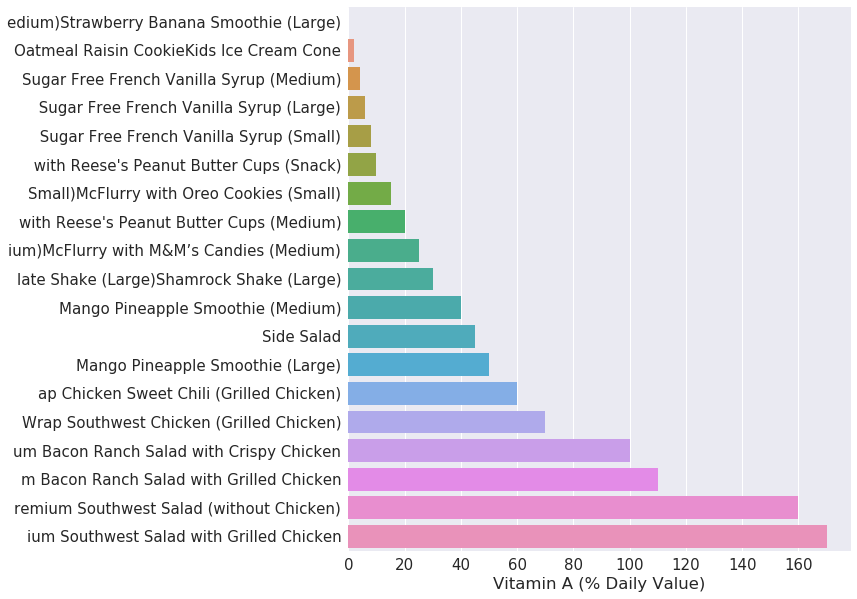

In [19]:
vitaminA = data.groupby(data["Vitamin A (% Daily Value)"])
plot(vitaminA)

and about salads, do not forget :3

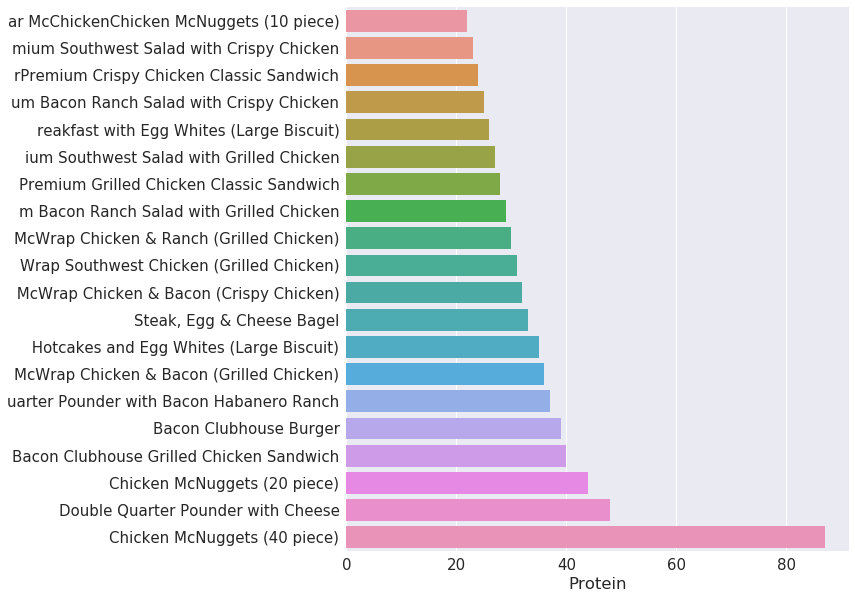

In [20]:
protein = data.groupby(data["Protein"])
plot(protein)

Protein is a good thing. So say athletes, let us them to believe:) 
Conscience does not allow to finish without showing you the worst enemies-foods high in cholesterol and TRANS fats!

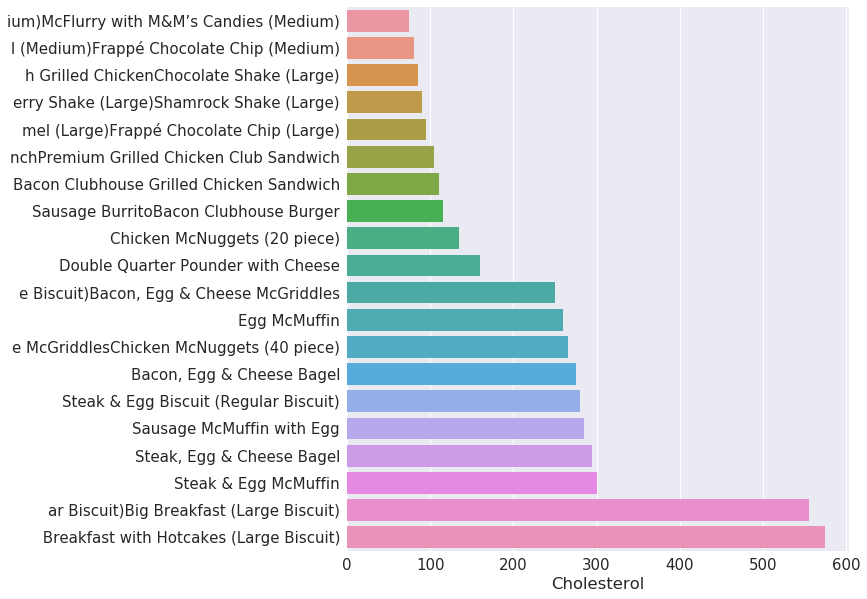

In [21]:
cholesterol = data.groupby(data["Cholesterol"])
plot(cholesterol)

![![image.png](attachment:image.png)](https://cosmopolitan.hu/app/uploads/2016/02/mcdonalds-sultkrumpli-cosmopolitan1415x275.png)

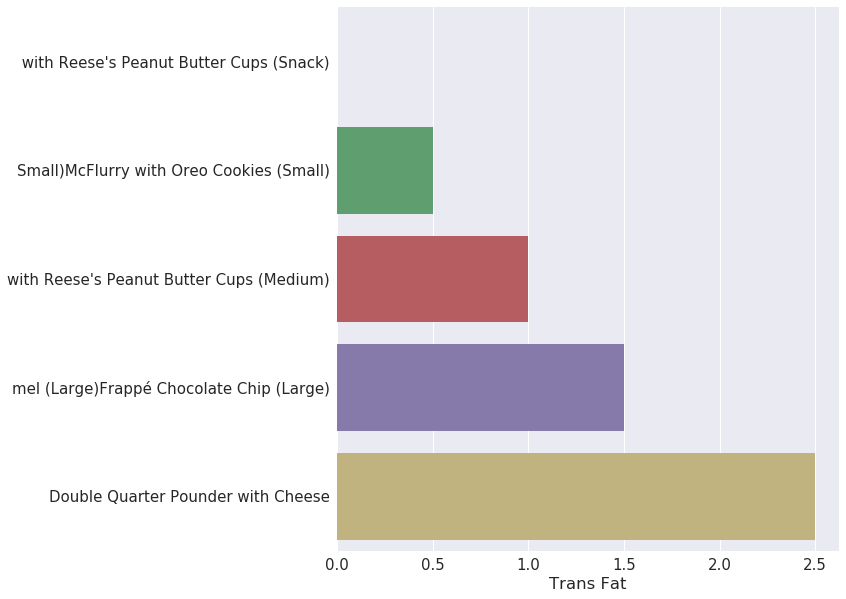

In [22]:
fats = data.groupby(data["Trans Fat"])
plot(fats)

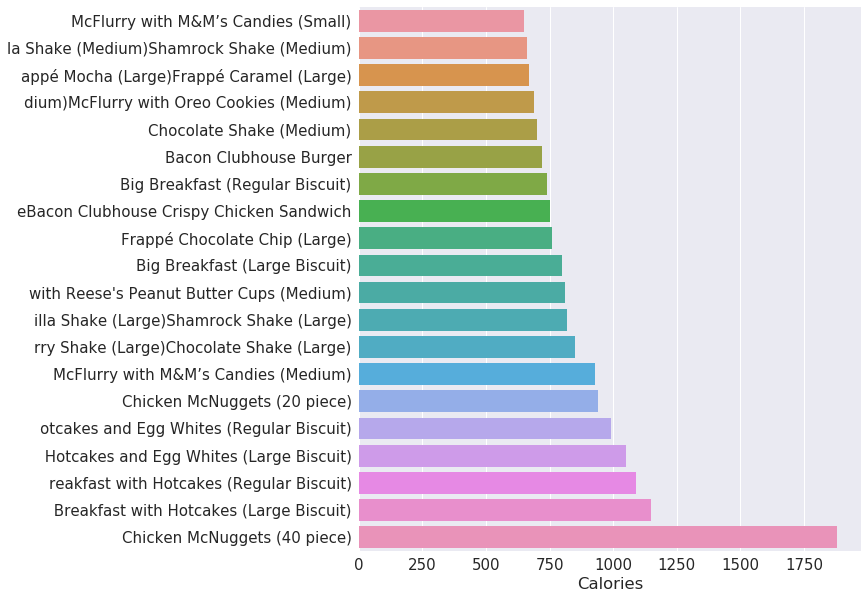

In [23]:
calories = data.groupby(data["Calories"])
plot(calories)

Oh, chicken mcnuggets! I declare war on you!